# Estadística descriptiva para analítica

## 1. Tipos de datos

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [5]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [7]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


## 2. Medidas de tendencia central en Python

In [8]:
# Promedio sobre una columna de precio
df['price_usd'].mean()

6639.971021255604

In [9]:
# Mediana sobre el precio
df['price_usd'].median()

4800.0

<AxesSubplot:ylabel='Frequency'>

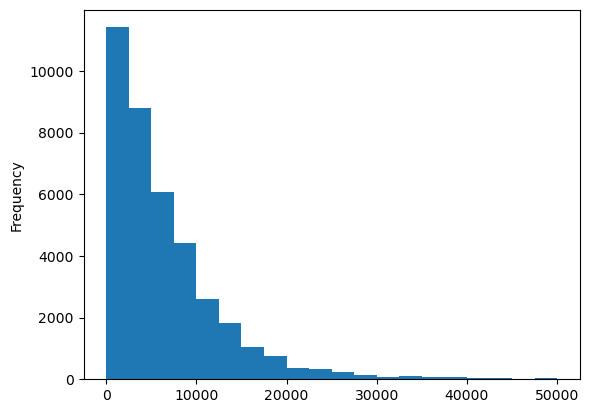

In [10]:
df['price_usd'].plot.hist(bins=20)

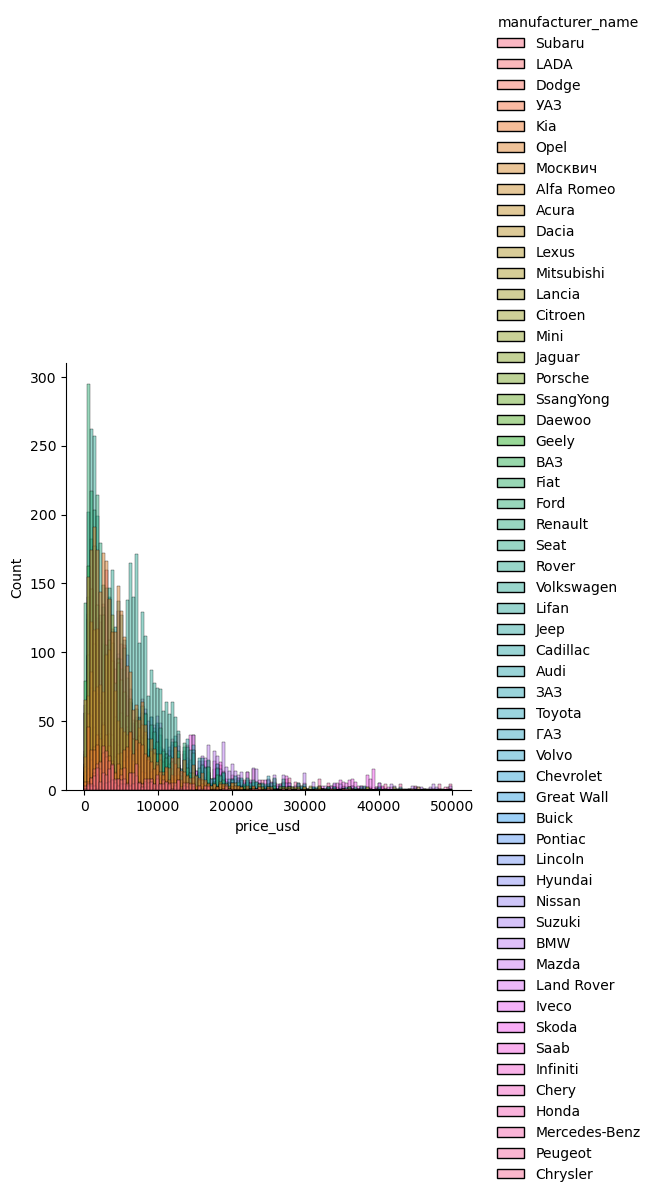

In [11]:
# Diagrama de distribución
# (df, x='columna-df', hue='categorias')
# Es un grafico muy cargado, pierde el sentido... 
# La intensión del grafico es que los datos sean faciles de leer
sns.displot(df, x = 'price_usd', hue='manufacturer_name')

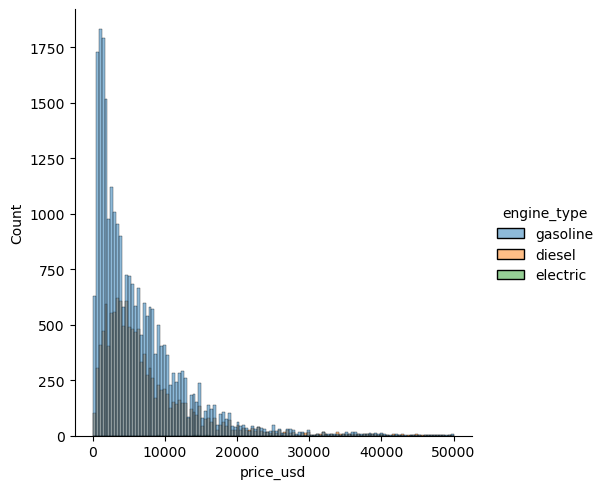

In [12]:
sns.displot(df, x='price_usd', hue='engine_type')

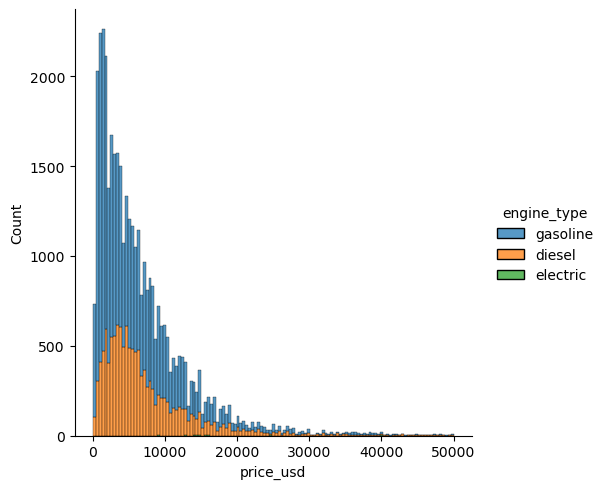

In [13]:
# Apilando las barras
sns.displot(df, x='price_usd', hue='engine_type', multiple='stack')

In [14]:
df['engine_type'].value_counts()

gasoline    25647
diesel      12874
electric       10
Name: engine_type, dtype: int64

In [15]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


In [16]:
df['manufacturer_name'].value_counts()

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [17]:
df_Q7 = df[(df['manufacturer_name'] == 'Audi') & (df['model_name'] == 'Q7')]
df_Q7.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19515,Audi,Q7,automatic,grey,275000,2007,diesel,False,diesel,3.0,...,False,False,False,False,False,False,False,False,False,21
19547,Audi,Q7,automatic,white,105000,2014,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,216
19559,Audi,Q7,automatic,other,170000,2006,diesel,False,diesel,3.0,...,True,True,True,True,True,False,True,False,True,24
19574,Audi,Q7,automatic,black,185000,2016,diesel,False,diesel,3.0,...,False,False,True,True,True,True,True,True,True,7
19583,Audi,Q7,automatic,other,210000,2010,diesel,False,diesel,4.2,...,True,True,True,False,True,True,True,True,True,45


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

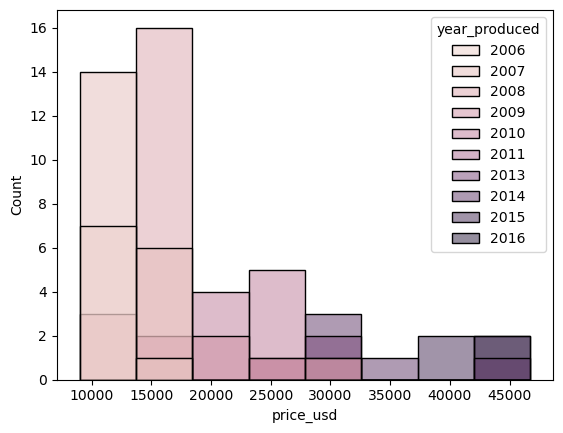

In [18]:
sns.histplot(df_Q7, x='price_usd', hue='year_produced')

## 3. Medidas de dispersión en Python

In [19]:
# Desviaciòn estandar
df['price_usd'].std()

6428.152018202915

In [20]:
# Rango = valor max. - valor min.
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [21]:
# Cuartiles
Q2 = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)

print(f'Cuartil 1: {Q1}, Cuartil 2: {Q2}, Cuartil 3: {Q3}')

Cuartil 1: 2100.0, Cuartil 2: 4800.0, Cuartil 3: 8990.0


In [22]:
# Rango intercuantil
iqr = Q3 - Q1
iqr

6890.0

In [23]:
min_limit = Q1 - 1.5 * iqr
min_limit

-8235.0

In [24]:
max_limit = Q3 - 1.5 * iqr
max_limit

-1345.0

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

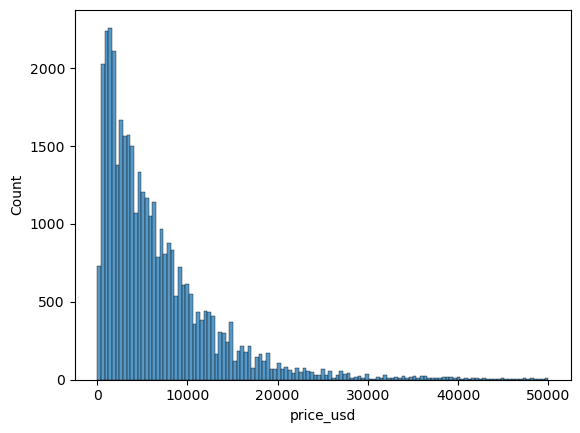

In [25]:
sns.histplot(df['price_usd'])

c:\Users\usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_usd'>

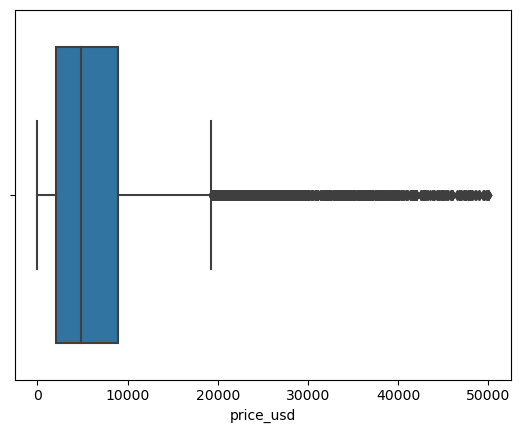

In [26]:
sns.boxplot(df['price_usd'])

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

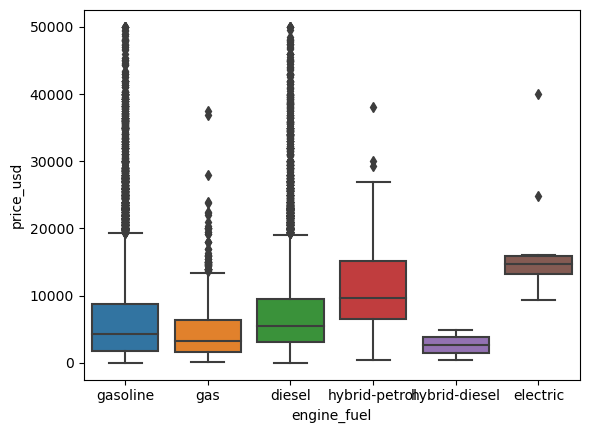

In [27]:
sns.boxplot(x ='engine_fuel', y = 'price_usd', data = df)

## 4. Diagramas de dispersión en el análisis de datos

In [28]:
# Dataset de atributos especiales de las flores iris
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

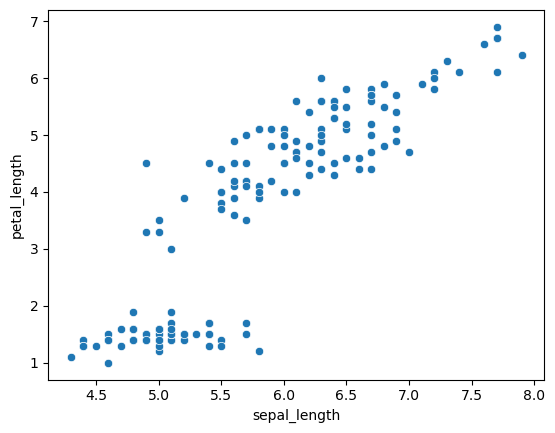

In [29]:
# Scatterplot
sns.scatterplot(data = iris, x = 'sepal_length', y = 'petal_length')

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

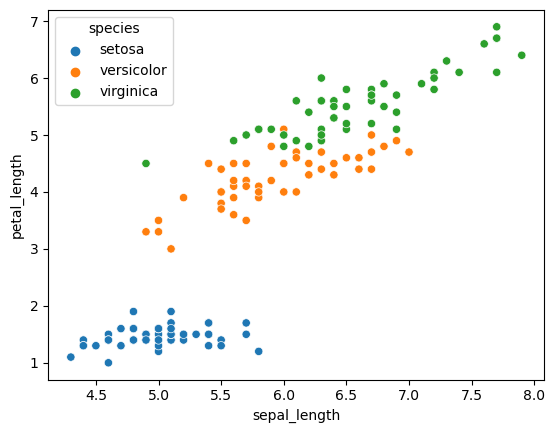

In [30]:
sns.scatterplot(data = iris, x = 'sepal_length', y = 'petal_length', hue = 'species')

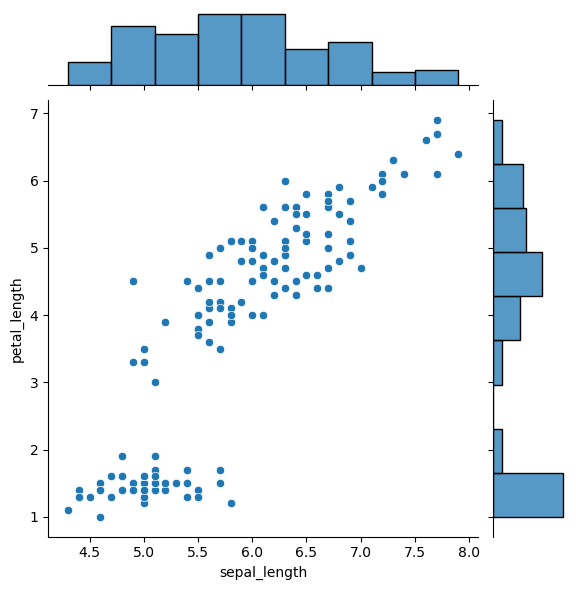

In [31]:
# Join plot
sns.jointplot(data = iris, x = 'sepal_length', y = 'petal_length')

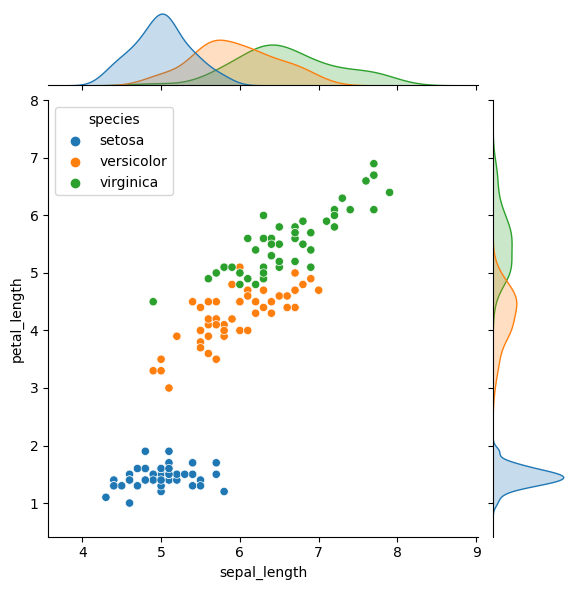

In [32]:
sns.jointplot(data = iris, x = 'sepal_length', y = 'petal_length', hue = 'species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

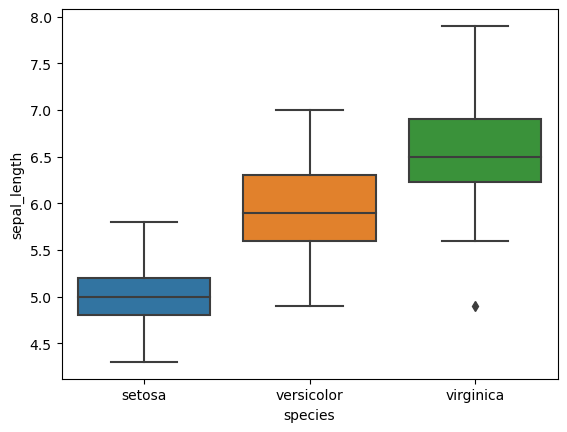

In [33]:
# Box plot
sns.boxplot(data = iris, x = 'species', y = 'sepal_length')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

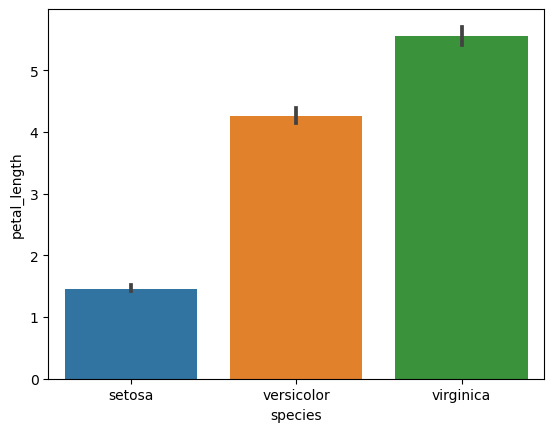

In [34]:
# Barplot
sns.barplot(data = iris, x = 'species', y = 'petal_length')